In [2]:
from bayespy.nodes import GaussianARD, Gamma

In [3]:
import numpy as np
k = 2 # slope
c = 5 # bias
s = 2 # noise standard deviation

In [4]:
x = np.arange(10)
y = k*x + c + s*np.random.randn(10)

In [5]:
X = np.vstack([x, np.ones(len(x))]).T

In [9]:
from bayespy.nodes import GaussianARD
B = GaussianARD(0, 1e-6, shape=(2,))

In [10]:
from bayespy.nodes import SumMultiply
F = SumMultiply('i,i', B, X)

In [11]:
from bayespy.nodes import Gamma
tau = Gamma(1e-3, 1e-3)

In [12]:
Y = GaussianARD(F, tau)

In [13]:
Y.observe(y)

In [14]:
from bayespy.inference import VB
Q = VB(Y, B, tau)

In [15]:
Q.update(repeat=1000)

Iteration 1: loglike=-4.490318e+01 (0.010 seconds)
Iteration 2: loglike=-4.408395e+01 (0.007 seconds)
Iteration 3: loglike=-4.407193e+01 (0.007 seconds)
Iteration 4: loglike=-4.407150e+01 (0.008 seconds)
Converged at iteration 4.


In [16]:
xh = np.linspace(-5, 15, 100)
Xh = np.vstack([xh, np.ones(len(xh))]).T
Fh = SumMultiply('i,i', B, Xh)

/home/lamahechag/anaconda3/lib/python3.7/site-packages/bayespy/plot.py:383: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0 = fig.add_subplot(M, N, 1)
/home/lamahechag/anaconda3/lib/python3.7/site-packages/bayespy/plot.py:383: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0 = fig.add_subplot(M, N, 1)


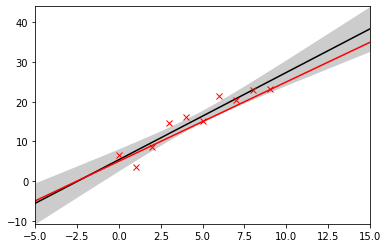

In [17]:
import bayespy.plot as bpplt
bpplt.pyplot.figure()
bpplt.plot(Fh, x=xh, scale=2)
bpplt.plot(y, x=x, color='r', marker='x', linestyle='None')
bpplt.plot(k*xh+c, x=xh, color='r');

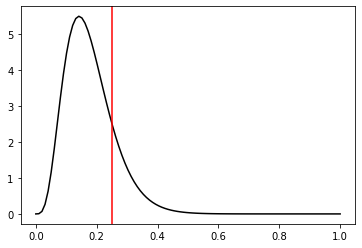

In [18]:
bpplt.pyplot.figure()
bpplt.pdf(tau, np.linspace(1e-6,1,100), color='k')
bpplt.pyplot.axvline(s**(-2), color='r');

/home/lamahechag/anaconda3/lib/python3.7/site-packages/bayespy/plot.py:383: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0 = fig.add_subplot(M, N, 1)


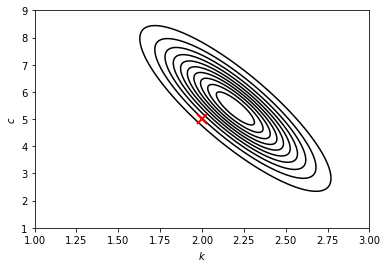

In [19]:
bpplt.pyplot.figure();
bpplt.contour(B, np.linspace(1,3,1000), np.linspace(1,9,1000),
              n=10, colors='k');
bpplt.plot(c, x=k, color='r', marker='x', linestyle='None',
           markersize=10, markeredgewidth=2)
bpplt.pyplot.xlabel(r'$k$');
bpplt.pyplot.ylabel(r'$c$');

In [20]:
from bayespy.nodes import GaussianGamma
B_tau = GaussianGamma(np.zeros(2), 1e-6*np.identity(2), 1e-3, 1e-3)

In [21]:
F_tau = SumMultiply('i,i', B_tau, X)

In [22]:
Y = GaussianARD(F_tau, 1)

In [23]:
Y.observe(y)
Q = VB(Y, B_tau)
Q.update(repeat=1000)

Iteration 1: loglike=-4.568649e+01 (0.008 seconds)
Iteration 2: loglike=-4.568649e+01 (0.006 seconds)
Converged at iteration 2.
